## Part 2 -  Connecting Python to SQL (Project Terbbuy)

In [1]:
import numpy as np
import pandas as pd

In [2]:
#to connect python to Sql
!pip install mysql-connector-python

In [3]:
#import packages
import mysql.connector

In [4]:
#Connecting to the database first
conn=mysql.connector.connect(host='127.0.0.1',database='Terpbuy',user='root',password='Mugiwara@09')

In [5]:
#Example for testing 
df_customers=pd.read_sql('select * from customer',conn,index_col='customer_id')
df_customers

C:\Users\Admin\AppData\Local\Temp\ipykernel_19240\2072216730.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_customers=pd.read_sql('select * from customer',conn,index_col='customer_id')


,city,first_name,last_name,segment,state,street,zipcode
customer_id,,,,,,,
1,Brownsville,Richard,Hernandez,CONSUMER,TX,6303 Heather Plaza,78521
8,Lawrence,Megan,Smith,CORPORATE,MA,3047 Foggy Forest Plaza,01841
16,Caguas,Tiffany,Smith,CORPORATE,PR,6651 Iron Port,00725
17,Taylor,Mary,Robinson,CONSUMER,MI,1325 Noble Pike,48180
20,West New York,Mary,Ellis,CONSUMER,NJ,4703 Old Route,07093
...,...,...,...,...,...,...,...
20738,Caguas,Cathleen,Kaufman,HOME_OFFICE,PR,472 Cinder Sky Farm,00725
20740,Caguas,Aphrodite,Fernandez,HOME_OFFICE,PR,8906 Cotton Alley,00725
20741,Detroit,Carissa,Erickson,HOME_OFFICE,MI,5599 Umber Cloud Street,48238


In [7]:
#Q.1) Write a query to show the quantity of items sold by each department. Sort the results by department name.
df_dept=pd.read_sql('select * from department',conn)
df_dept

df_department=pd.read_sql('select d.department_name,ol.quantity_sold from product p inner join order_line ol on p.product_id=ol.product_id \
                          inner join department d on d.department_id=p.department_id',conn,index_col='department_name')
df_department

C:\Users\Admin\AppData\Local\Temp\ipykernel_19240\1471401125.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_dept=pd.read_sql('select * from department',conn)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19240\1471401125.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_department=pd.read_sql('select d.department_name,ol.quantity_sold from product p inner join order_line ol on p.product_id=ol.product_id \


,quantity_sold
department_name,
Fan Shop,1
Golf,2
Footwear,4
Apparel,4
Apparel,2
...,...
Apparel,1
Apparel,1
Apparel,1


In [11]:
#Q.2) Using the query you wrote in Question 1, create a data visualization (e.g., a bar chart) showing all departments and the 
## number of items each of them sold. Using a markdown cell, explain what you observe from the analysis.
#Step 1 - Aggregated items sold per department (Used groupby function to group by particular column)
df_dept_sales=df_department.groupby('department_name')['quantity_sold'].sum().to_frame()
df_dept_sales

,quantity_sold
department_name,
Apparel,2336
Book Shop,12
Discs Shop,285
Fan Shop,2406
Fitness,244
Footwear,932
Golf,2355
Health and Beauty,64
Outdoors,812


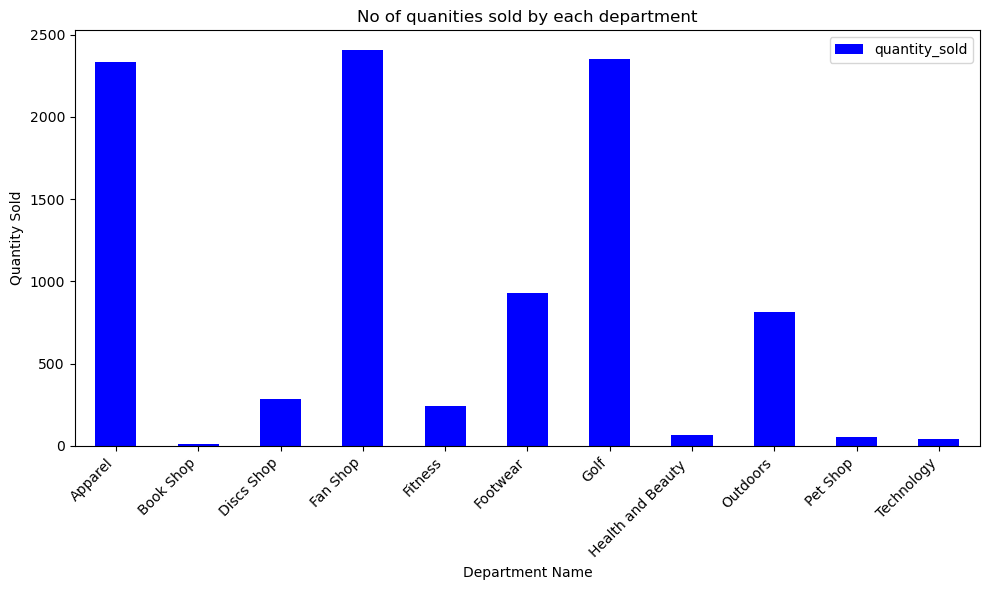

In [15]:
#Step 2 - Plotting the bar chart for data visualization
import matplotlib.pyplot as plt
df_dept_sales.plot(kind='bar',figsize=(10,6),color='blue')
plt.title('No of quanities sold by each department')
plt.xlabel('Department Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

## Observation from Department-wise Sales Analysis
1) The bar chart shows the total number of items sold across different departments
2) From the visualization, we can observe that some departments significantly outperform others in terms of sales volume.
3) As we can see Fan Shop department has sold highest no of product quantities.
4) This suggests higher customer demand or better-performing products in those departments.
5) The book shop department which has lowest quanitities sold is followed by other departments like health and beauty,pet shop and technology.
6) Departments with lower sales may require targeted marketing efforts or product optimization.
7) Overall, the chart helps the commercial team identify strong and weak performing departments for strategic decision-making.
   

In [19]:
#Q.3)Write a query to show the number of orders placed in each year in which at least one order was placed.
## Hint: Search online to learn about MySQL’s YEAR() function to query data.
df_orders_placed=pd.read_sql('select year(order_date) as order_year,count(*) as No_of_orders from orders group by order_year',conn,index_col='order_year')
df_orders_placed

C:\Users\Admin\AppData\Local\Temp\ipykernel_19240\2218683953.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_orders_placed=pd.read_sql('select year(order_date) as order_year,count(*) as No_of_orders from orders group by order_year',conn,index_col='order_year')


,No_of_orders
order_year,
2018,585
2019,708
2020,497
2021,362


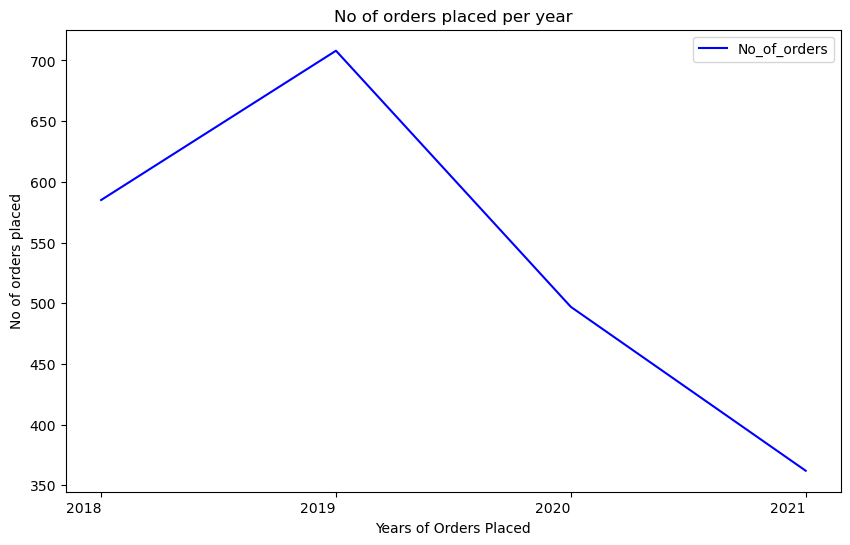

In [40]:
#Q.4) Using the query you wrote in Question 3, create a data visualization (e.g., a line graph) showing all years and the number of orders 
## placed during each year, to see if there is a trend in ordering.
## Using a markdown cell, explain what you observe from the analysis.
#Answer-  As the data set isalready framed we will directly plot a line graph
#Note-Used new functions such as xticks and xticklabels.xticklabels overrides the display text
plt_orders=df_orders_placed.plot(kind='line',figsize=(10,6),color='blue')
plt_orders.set_xticks(df_orders_placed.index.astype(int))
plt_orders.set_xticklabels(df_orders_placed.index.astype(int))
plt.title('No of orders placed per year')
plt.xlabel('Years of Orders Placed')
plt.ylabel('No of orders placed')
plt.xticks(rotation=360,ha='right')
plt.show()

## Observations from Trend Analysis of Orders Placed
1) The line graph shows the no of orders placed from year 2018 to year 2021
2) From the visualization,we can observe that the number of orders placed shows a clear upward trend between 2018 and 2019, indicating increased customer activity and higher demand during this period.
3) The year 2019 recorded the highest number of orders placed, marking the peak of customer demand across the observed timeframe.
4) After peaking in 2019, the number of orders declines through 2020 and 2021, suggesting a reduction in order volume that may be influenced by changing market conditions or external factors.
5) The declining trend highlights the importance of customer retention and re-engagement strategies to stabilize order volumes.
6) Since 2019 represents the peak in order volume, it can serve as a benchmark year for evaluating future performance and recovery efforts.